In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
# pearsonr : 선형상관관계 
# spearmanr : 상관관계

from datetime import datetime, timedelta

plt.style.use('dark_background')
mpl.rcParams['axes.unicode_minus'] = False
font_path = '/Users/chan/Desktop/Git Upload/py_coding/COVID19_correlation/AppleSDGothicNeo.ttf'
#C:\Users\chan\Desktop\Git Upload\py_coding\COVID19_correlation\dataset
font_name = fm.FontProperties(fname=font_path, size=50).get_name()
plt.rc('font', family=font_name)

In [11]:
# Load BIg % dataset

# 개방성을 판단하는데 있어서 "당신은 파티를 즐기는 성격입니까?"라는 질문은 긍정적 질문이다.
pos_questions = [
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7 Openness 개방성
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6 Conscientiousness 성실성
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5 Extroversion 외향성
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6 Agreeableness 친화성
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8 Emotional Stability 안정성(신경성)
]

# "당신은 집에있는걸 좋아하는 성격입니까?" 는 negeative 질문
neg_questions = [
    'OPN2','OPN4','OPN6',                # 3 Openness
    'CSN2','CSN4','CSN6','CSN8',         # 4 Conscientiousness
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5 Extroversion
    'AGR1','AGR3','AGR5','AGR7',         # 4 Agreeableness
    'EST2','EST4',                       # 2 Emotional Stability
]

usecols = pos_questions + neg_questions + ['country']

#df = pd.read_csv('dataset/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t', usecols=usecols)

df = pd.read_csv('data-final.csv', sep='\t', usecols=usecols) # tsv
print(len(df))

df.head()
#세로축은 사람을 의미 / 가로축은 질문의 답변을 의미

1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [22]:
# 0점을 가진 값들을 다 제거 후 인덱스 초기화.
df = df.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)

print(len(df))

df.head()

874366


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [24]:
# 100명이상 답변한 나라만 추출

df_2 = (df.groupby('country').agg('count')['EXT1'] > 100).reset_index()
fc = df_2[df_2['EXT1'] == True]['country']
df = df[df['country'].isin(fc)].reset_index(drop=True)

df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872089,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
872090,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
872091,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
872092,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


In [26]:
# 기존의 점수 1~5 : -2 ~ +2점으로 변환한다.
df[pos_questions] = df[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})

# negative는 positive와 반대되는 점수이기 때문에 점수의 구간을 positive와 반대로 변환
df[neg_questions] = df[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})

df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,-2.0,1.0,-1.0,2.0,-1.0,1.0,-1.0,2.0,-2.0,1.0,...,1.0,-2.0,1.0,-2.0,1.0,-1.0,0.0,-2.0,-1.0,GB
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,...,2.0,-2.0,2.0,0.0,1.0,-2.0,-1.0,-1.0,0.0,MY
2,-1.0,0.0,-2.0,-1.0,0.0,2.0,-2.0,0.0,-1.0,-2.0,...,1.0,-1.0,1.0,-2.0,2.0,-1.0,0.0,-2.0,-2.0,GB
3,-1.0,2.0,-1.0,0.0,-2.0,2.0,-1.0,-1.0,-2.0,-1.0,...,2.0,-1.0,2.0,0.0,1.0,-2.0,-2.0,0.0,0.0,GB
4,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-2.0,0.0,-1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,0.0,-1.0,-1.0,KE


In [36]:
#Compute Scores
# 같은 항목의 점수를 통합(개방성, 성실성, 외향성, 친화성, 안정성)
traits = {
    'OPN': '개방성',
    'CSN': '성실성',
    'EXT': '외향성',
    'AGR': '친화성',
    'EST': '안정성'
}

# 하나의 데이터마다 동일한 속성의 값을 더해서 return
for trait, trait_kor in traits.items():
    trait_cols = sorted([col for col in df.columns if trait in col])
    df[trait_kor] = df[trait_cols].sum(axis=1)

df_traits = df[list(traits.values()) + ['country']].copy()
df_traits.head()

,개방성,성실성,외향성,친화성,안정성,country
0,-6.0,-5.0,0.0,1.0,-8.0,GB
1,-3.0,1.0,-10.0,-4.0,-9.0,MY
2,-5.0,-2.0,-7.0,-5.0,-9.0,GB
3,-2.0,-10.0,-5.0,-4.0,-3.0,GB
4,-3.0,-1.0,-4.0,0.0,-14.0,KE


C:\Users\chan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54693 missing from current

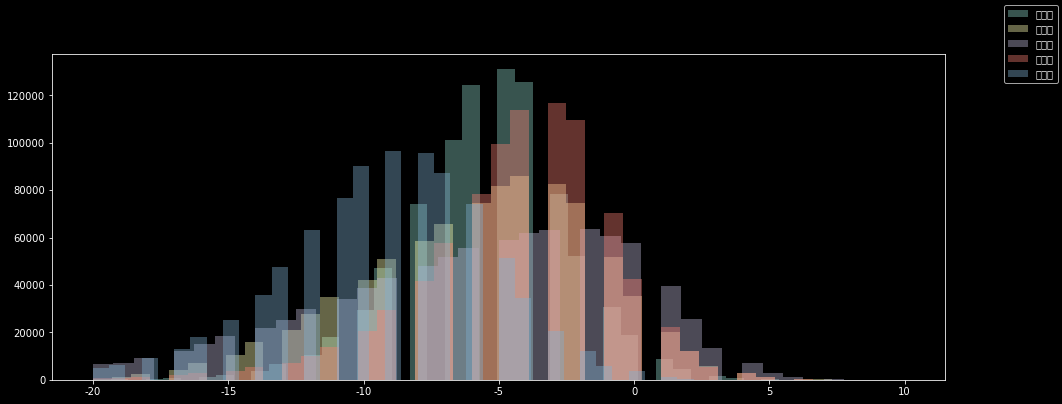

In [41]:
fig = plt.figure(figsize=(16, 6))

for trait in traits.values():
    sns.distplot(df_traits[trait], kde=False, bins=40, axlabel=False)

fig.legend(traits.values())

C:\Users\chan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44397 missing from current f

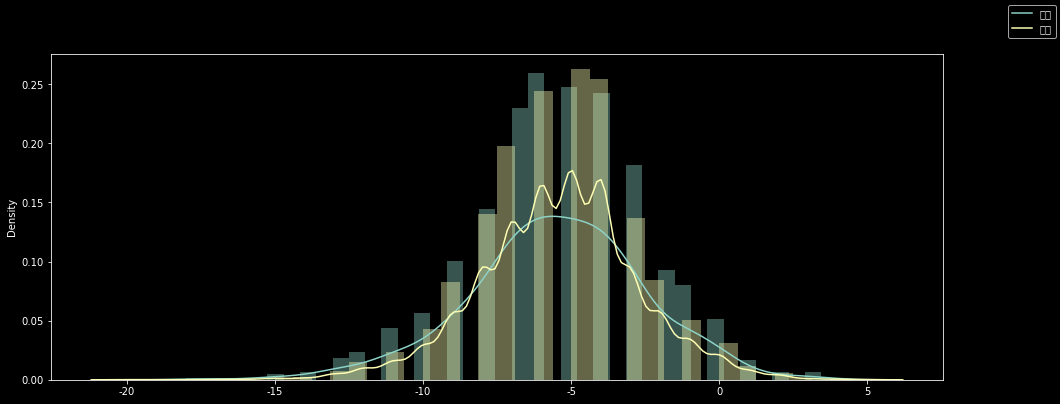

In [34]:
fig = plt.figure(figsize=(16, 6))

sns.distplot(df_traits[df_traits['country'] == 'KR']['개방성'], bins=40, axlabel=False)
sns.distplot(df_traits[df_traits['country'] == 'DE']['개방성'], bins=40, axlabel=False)

fig.legend(['한국', '독일'])

In [15]:
# 나라병 평균점수
df_traits_mean = df_traits.groupby('country').mean().rename_axis('country').reset_index()

df_traits_mean

,country,개방성,성실성,외향성,친화성,안정성
0,AE,7.639791,4.032090,0.261933,7.917770,1.475732
1,AL,10.188889,3.391667,-1.361111,6.205556,1.361111
2,AR,10.133075,1.678530,-1.654932,6.416248,2.381431
3,AT,10.836251,2.518538,-0.100412,6.876931,-0.143666
4,AU,8.551472,3.626061,-0.062085,7.918328,0.393272
...,...,...,...,...,...,...
108,US,9.105058,4.166036,-0.214579,8.338453,0.366914
109,UY,9.848375,2.137184,-1.902527,6.324910,1.574007
110,VE,10.106996,1.933128,-1.233539,5.512346,1.705761
111,VN,6.272773,2.327828,-2.323323,5.792793,1.590591
